## 02

In [35]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import poisson

In [36]:
# 2.1 例題：種子数の統計モデリング

In [37]:
data = np.array([
    2,2,4,6,4,5,2,3,1,2,
    0,4,3,3,3,3,4,2,7,2,
    4,3,3,3,4,3,7,5,3,1,
    7,6,4,6,5,2,4,7,2,2,
    6,2,4,5,4,5,1,3,2,3,
])

In [38]:
print(len(data))

50


In [39]:
# データの要約
print(data.min())
print(np.quantile(data,0.25))
print(np.quantile(data,0.5))
print(data.mean())
print(np.quantile(data,0.75))
print(data.max())

0
2.0
3.0
3.56
4.75
7


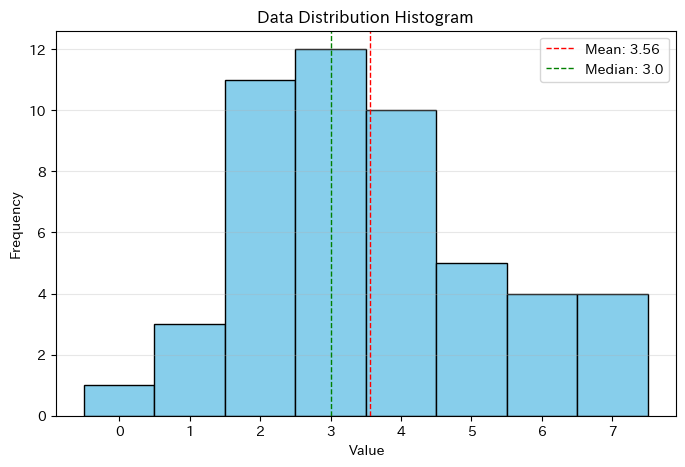

In [40]:
# ヒストグラム
# ヒストグラムの描画
plt.figure(figsize=(8, 5))
plt.hist(data, bins=range(min(data), max(data) + 2), color='skyblue', edgecolor='black', align='left')

# 統計情報の追加
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(data):.2f}')
plt.axvline(np.median(data), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(data):.1f}')

# ラベルとタイトルの設定
plt.title('Data Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(min(data), max(data) + 1))
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

In [41]:
# 標本分散 (nで割る)
var_sample = np.var(data) 
# 不偏標本分散 (n-1で割る: 推計統計で一般的)
var_unbiased = np.var(data, ddof=1)
# 標本標準偏差 (nで割る)
std_sample = np.std(data)
# 不偏標本標準偏差 (n-1で割る)
std_unbiased = np.std(data, ddof=1)

print(f"標本分散: {var_sample:.3f}")
print(f"不偏標本分散: {var_unbiased:.3f}")
print(f"標本標準偏差: {std_sample:.3f}")
print(f"不偏標本標準偏差: {std_unbiased:.3f}")

標本分散: 2.926
不偏標本分散: 2.986
標本標準偏差: 1.711
不偏標本標準偏差: 1.728


In [42]:
# 2.2 データと確率分布の対応関係をながめる

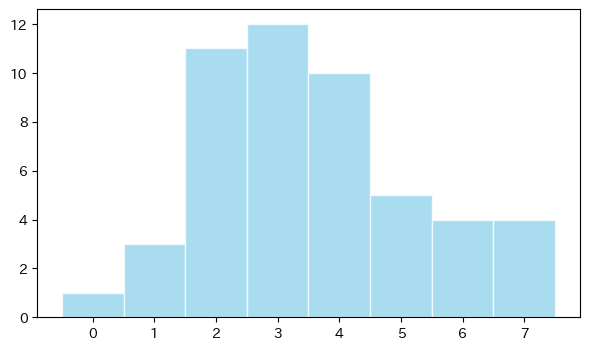

In [43]:
# データの平均 (λ)
mu = np.mean(data)

# プロット用のx軸（0からデータの最大値まで）
x = np.arange(0, np.max(data) + 1)

# ポアソン分布の理論値
poisson_pmf = poisson.pmf(x, mu)

plt.figure(figsize=(7, 4))

# ヒストグラム（正規化）
plt.hist(data, bins=np.arange(9)-0.5, color='skyblue', 
         edgecolor='white', alpha=0.7, label='Actual Data (Density)')

plt.show()

- 50個の個体の種子数の平均は3.56。
- 個体ごとの種子数にはばらつきがある。ヒストグラムを書くと山の分布になる。
- ばらつきを表現するには、確率分布を使うと良い。
- この種子数データを統計モデルで表現するには、ポアソン分布を使ってみるのが良さそう。

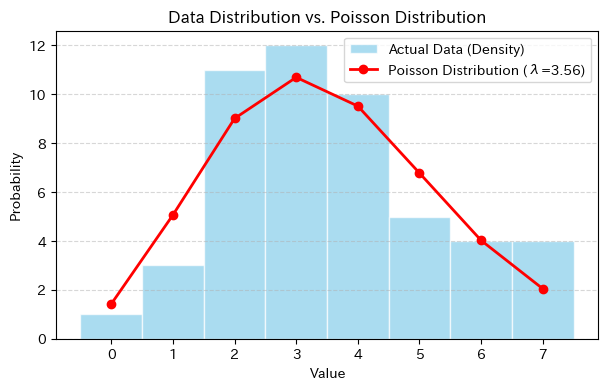

In [44]:
# データの平均 (λ)
mu = np.mean(data)

# プロット用のx軸（0からデータの最大値まで）
x = np.arange(0, np.max(data) + 1)

# ポアソン分布の理論値
poisson_pmf = poisson.pmf(x, mu)

plt.figure(figsize=(7, 4))

# ヒストグラム
plt.hist(data, bins=np.arange(9)-0.5, color='skyblue', 
         edgecolor='white', alpha=0.7, label='Actual Data (Density)')

# ポアソン分布の折れ線グラフ
plt.plot(x, poisson_pmf*len(data), marker='o', linestyle='-', color='red', 
         linewidth=2, label=f'Poisson Distribution (λ={mu:.2f})')

# グラフの装飾
plt.title('Data Distribution vs. Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

- 実際プロットしてみると、ポアソンで表現できていそうな感じはある。
- この納得感を定量化したい。
- そもそも何でポアソン分布を選んだのか。
    - データが非負の整数
    - データに加減はあるけど上限はよくわかんない
    - 平均と分散が大体等しい

In [45]:
# 2.4 ポアソン分布のパラーメータの最尤推定

- 最尤推定
    - 尤度（当てはまりの良さ）を表す統計量を最大にするようなパタメータを探索するパラメータ推定方法
    - 「手元にあるデータが、どんな確率分布から出てきたと考えれば納得感があるか」の定量化って感じ
    - 尤度は、あるパラメータのもとで、そのデータが同時に観測される確率と言える

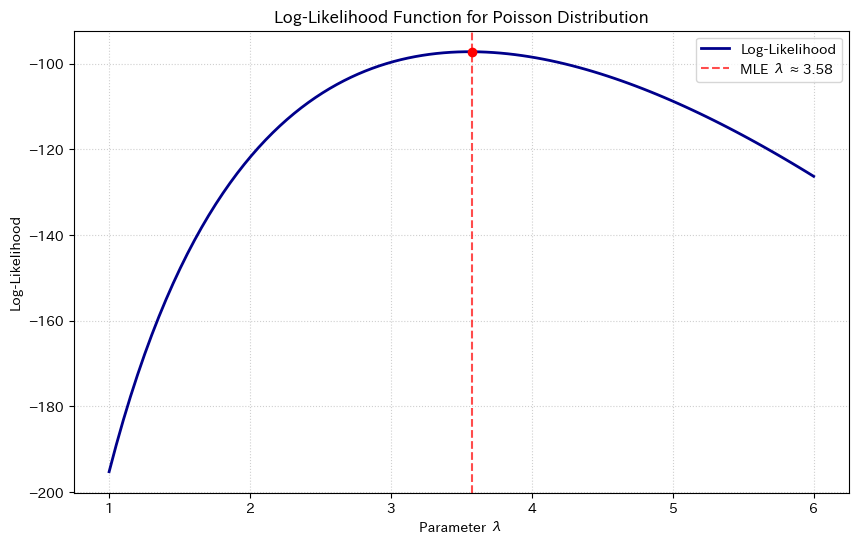

最尤推定量 (MLE) の λ: 3.5758
データの標本平均: 3.5600


In [46]:
# パラメータごとに、元データの尤度をプロット

# 元データ
data = np.array([
    2,2,4,6,4,5,2,3,1,2,
    0,4,3,3,3,3,4,2,7,2,
    4,3,3,3,4,3,7,5,3,1,
    7,6,4,6,5,2,4,7,2,2,
    6,2,4,5,4,5,1,3,2,3,
])

# 1. λの候補を作成（1.0から6.0まで細かく刻む）
lambda_candidates = np.linspace(1.0, 6.0, 100)

# 2. 各λに対する対数尤度を計算
# 対数尤度 = Σ log(P(x_i | λ))
log_likelihoods = [np.sum(poisson.logpmf(data, lmb)) for lmb in lambda_candidates]

# 3. 最尤推定量 (MLE) を特定
mle_lambda = lambda_candidates[np.argmax(log_likelihoods)]
max_log_likelihood = max(log_likelihoods)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(lambda_candidates, log_likelihoods, color='darkblue', linewidth=2, label='Log-Likelihood')

# 最大値（MLE）のポイントをマーク
plt.axvline(mle_lambda, color='red', linestyle='--', alpha=0.7, 
            label=f'MLE λ ≈ {mle_lambda:.2f}')
plt.scatter(mle_lambda, max_log_likelihood, color='red', zorder=5)

plt.title('Log-Likelihood Function for Poisson Distribution')
plt.xlabel('Parameter λ')
plt.ylabel('Log-Likelihood')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print(f"最尤推定量 (MLE) の λ: {mle_lambda:.4f}")
print(f"データの標本平均: {np.mean(data):.4f}")

In [47]:
# 2.4. 疑似乱数と最尤推定量のばらつき

推定値は「たまたま」の値になっただけ
- 種子数は、自然界のルールに基づいて得られるデータ
- 今回得られたデータもそのルールから得られたデータ
- そのデータを元に計算した推定値
- なので、もう一度サンプリングしたら違うデータが得られて、推定値もちょっと違うといったことが起こる

- 何回も調査する（1回50サンプルで平均を計算する）ことで、繰り返した時の推定値のばらつきが取得できる。これが標準誤差。これがわかると、誤差を把握した上で予測ができる。ただし、真のモデルを知らないと

In [48]:
# 2.5 統計モデルの要点：乱数発生、推定、予測

- 統計モデリングがデータ解析の中で果たす役割
- まず、「こういうばらつきがあるデータは、何か確率分布から発生したと考えればわかりやすいなあ」と考える
- 